In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0%|                                                | 0.00/199k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 4.00MB/s]


In [2]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
import sklearn
dataset = pd.read_csv("train.csv", index_col=0)
dataset.info()

/home/matthias/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [2]:
numerical_dataset      = dataset.select_dtypes(include="number")
numerical_dataset.fillna(inplace=True, axis=0, method='pad')
categorical_dataset = dataset.select_dtypes(exclude="number")
categorical_encoded_dataset = pd.get_dummies(categorical_dataset)

In [3]:
test_dataset = dataset.select_dtypes(include='number').loc[:,["OverallQual", "OverallCond", "YearBuilt", "TotalBsmtSF", "LotArea",  "LotFrontage", "SalePrice"]]
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1460 non-null   int64  
 1   OverallCond  1460 non-null   int64  
 2   YearBuilt    1460 non-null   int64  
 3   TotalBsmtSF  1460 non-null   int64  
 4   LotArea      1460 non-null   int64  
 5   LotFrontage  1460 non-null   float64
 6   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 91.2 KB


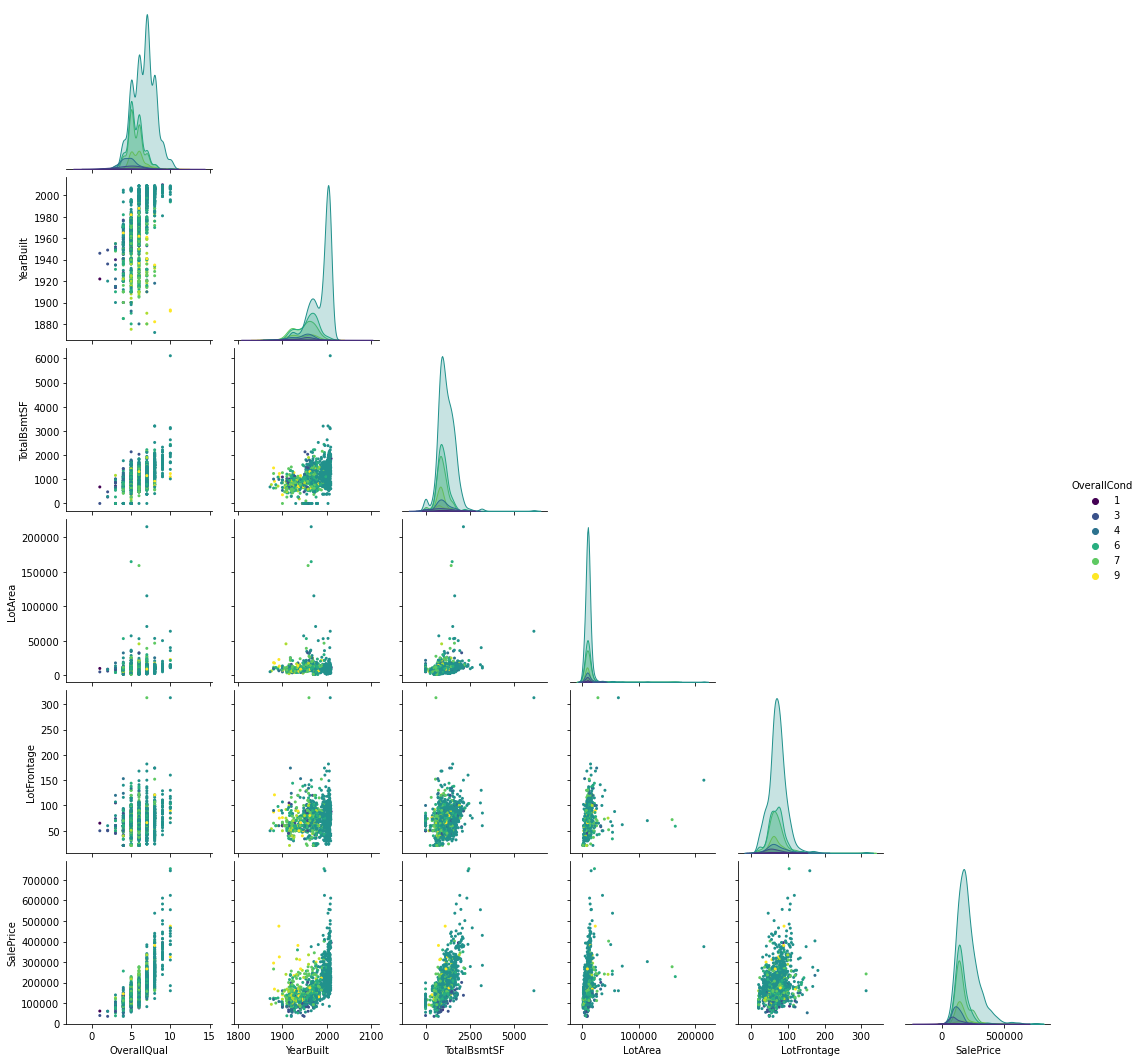

In [4]:
sns.pairplot(test_dataset, corner=True, hue="OverallCond", palette="viridis", plot_kws=dict(marker=".", linewidth=0))

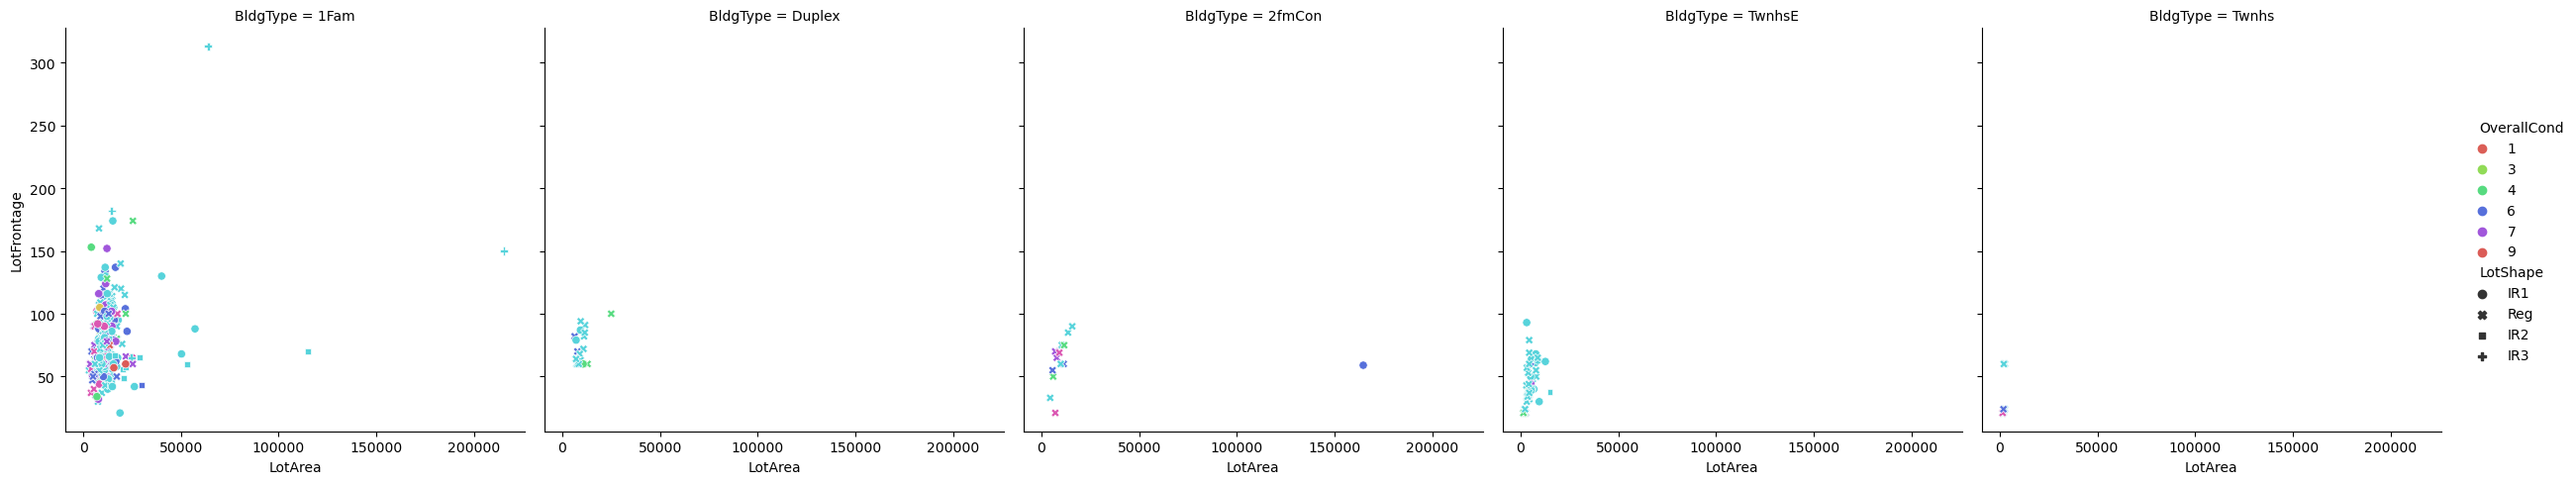

In [5]:
sns.relplot(data=dataset.sample(n=700), x="LotArea", y="LotFrontage",  hue="OverallCond", style="LotShape", palette="hls", kind="scatter", col="BldgType")

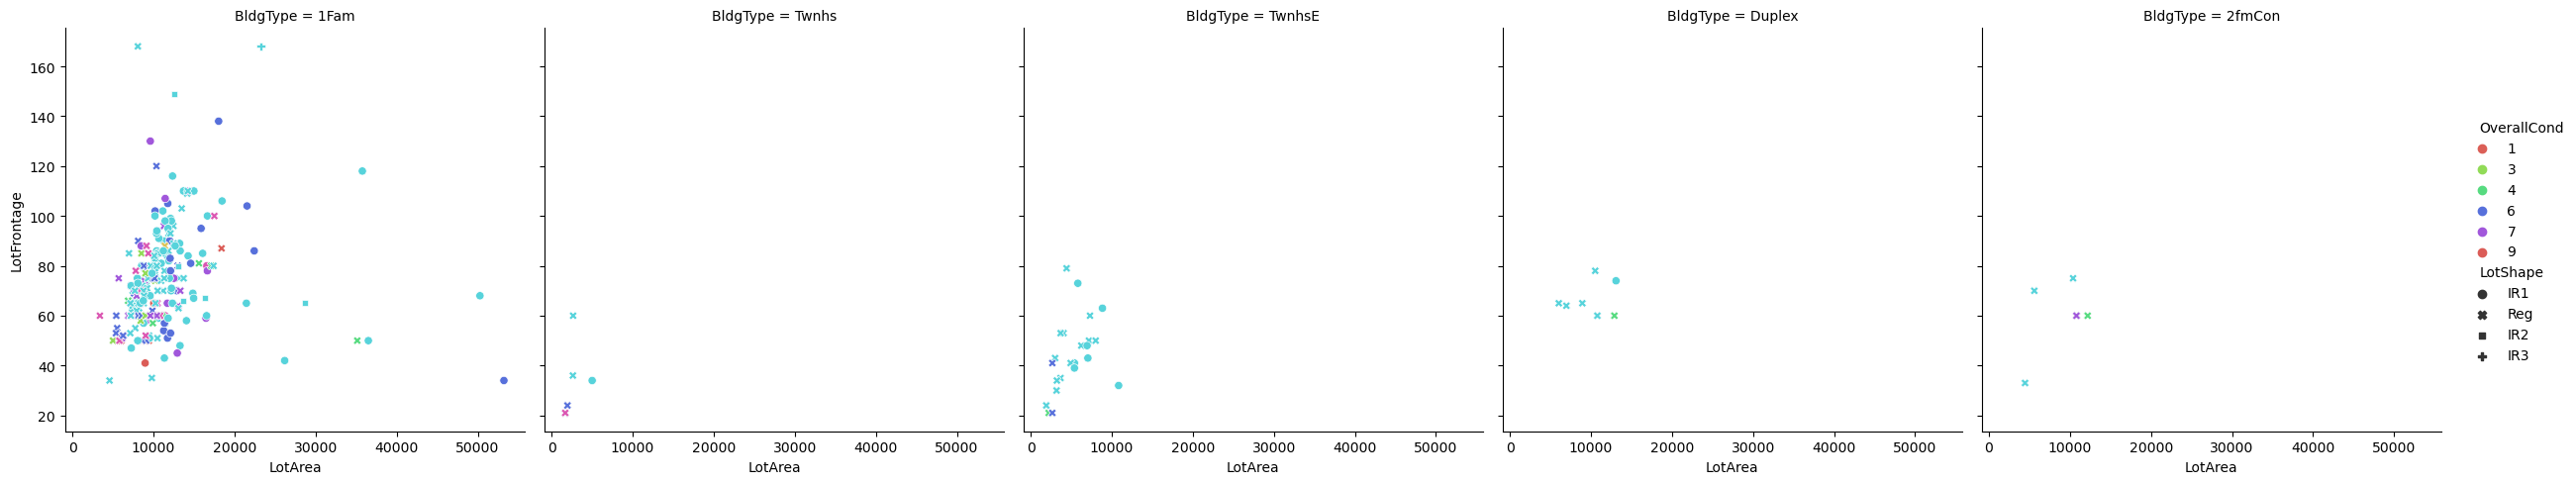

In [6]:
sns.relplot(data=dataset.sample(n=300), x="LotArea", y="LotFrontage",  hue="OverallCond", style="LotShape", palette="hls", kind="scatter", col="BldgType")

In [7]:
from scipy.cluster import hierarchy
import numpy as np

# df is a pandas.DataFrame instance
x = np.transpose(dataset.isnull().astype(int).values)
z = hierarchy.linkage(x, "ward")

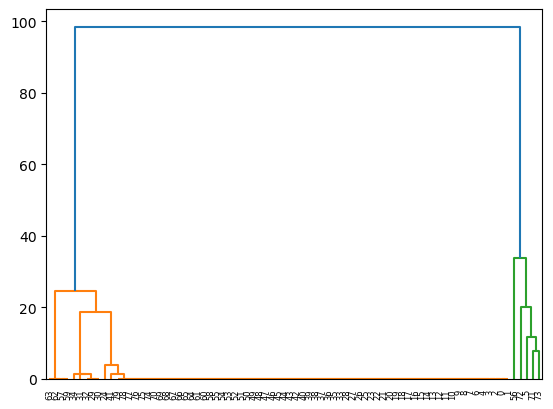

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
dn = dendrogram(z)
plt.show()

In [9]:
pd.get_dummies(dataset)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0


/home/matthias/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


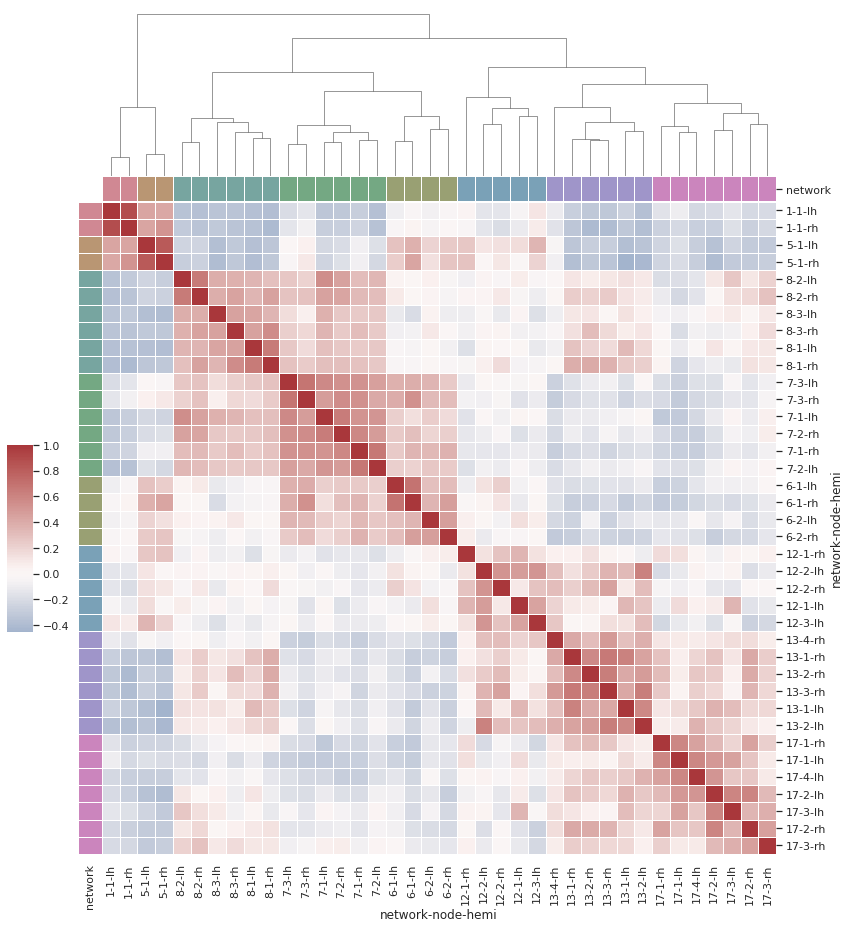

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

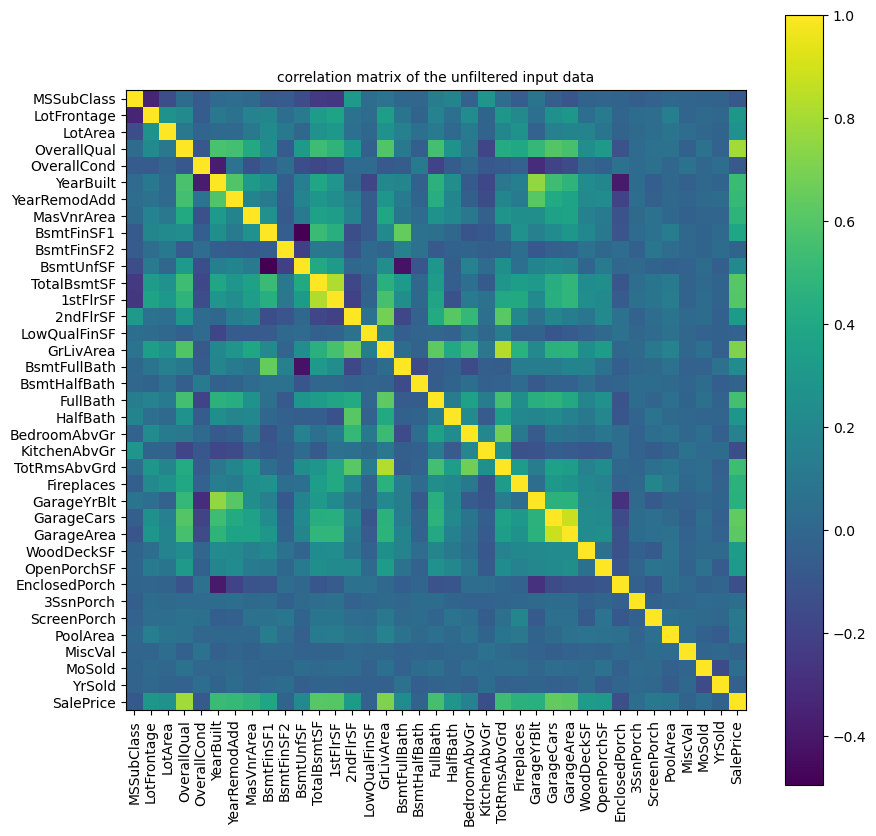

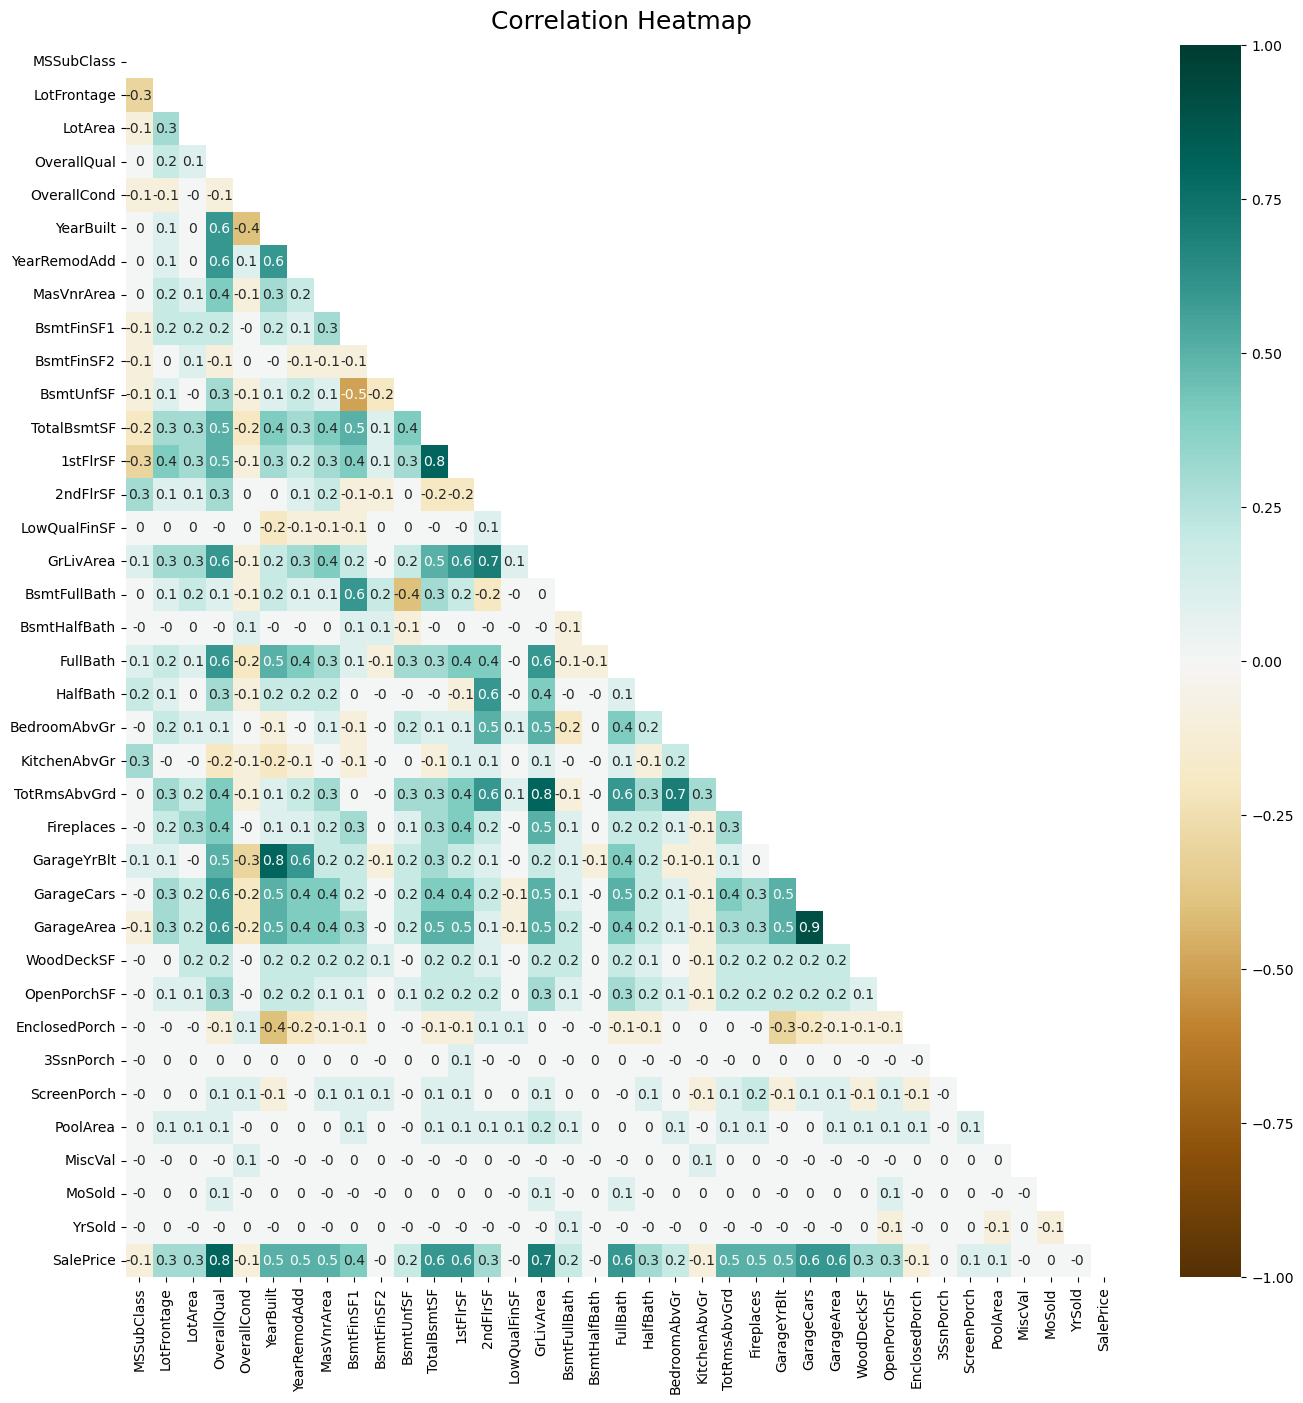

In [10]:
mat_corr = numerical_dataset.corr()
labels = list(mat_corr.index)
mat_corr_np = np.array(mat_corr)

plt.figure(figsize = (10, 10))
plt.imshow(mat_corr_np, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(mat_corr.index)), labels, rotation='vertical', fontsize=10)
plt.yticks(range(len(mat_corr.index)), labels, rotation='horizontal', fontsize=10)
plt.title('correlation matrix of the unfiltered input data', size=10)
plt.show()



plt.figure(figsize=(16, 16))
mask = np.triu(np.ones_like(mat_corr, dtype=bool))
heatmap = sns.heatmap(np.around(mat_corr, decimals=1), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [11]:
""" from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(pca_dataset["SalePrice"].values.reshape(-1,1))
pca_dataset["SalePrice"] = scaler.transform(pca_dataset["SalePrice"].values.reshape(-1,1))
pca_dataset """


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(categorical_encoded_dataset)

from sklearn.decomposition import PCA
pca      = sklearn.decomposition.PCA(n_components=2).fit(categorical_encoded_dataset)
coords   = pca.transform(categorical_encoded_dataset)

pca_dataset = pd.DataFrame()
pca_dataset["Label"] = kmeans.labels_
pca_dataset["SalePrice"] = dataset["SalePrice"]
pca_dataset[["X", "Y"]] = coords

pca_dataset

,Label,SalePrice,X,Y
0,3,NaN,2.139458,0.238773
1,2,208500.0,-0.363763,-0.827202
2,3,181500.0,2.441548,-0.328875
3,0,223500.0,-0.841965,0.651835
4,3,140000.0,2.469024,-0.459074
...,...,...,...,...
1455,3,185000.0,0.777776,0.563845
1456,2,175000.0,-1.031753,-1.301865
1457,3,210000.0,0.445846,0.298746
1458,2,266500.0,-0.980037,-0.682619


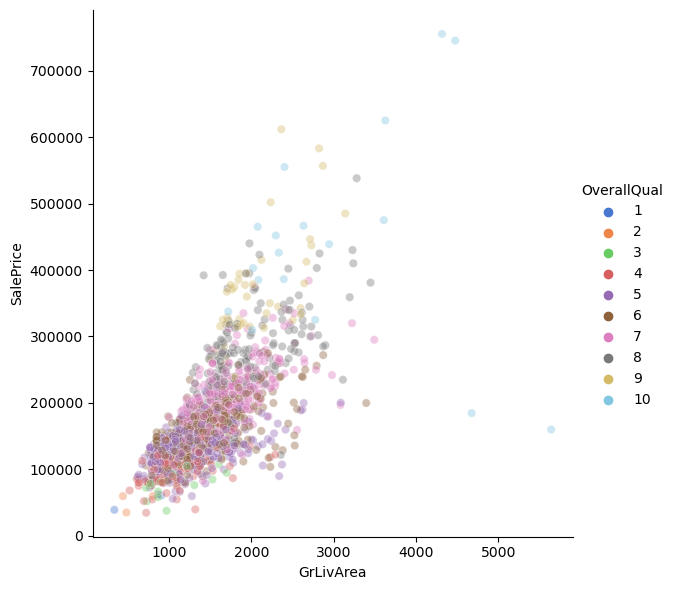

In [12]:
g = sns.relplot(x="GrLivArea", y="SalePrice", hue="OverallQual",
            sizes=(40, 400), alpha=.4, palette="muted",
            height=6, data=dataset)

/home/matthias/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/matthias/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


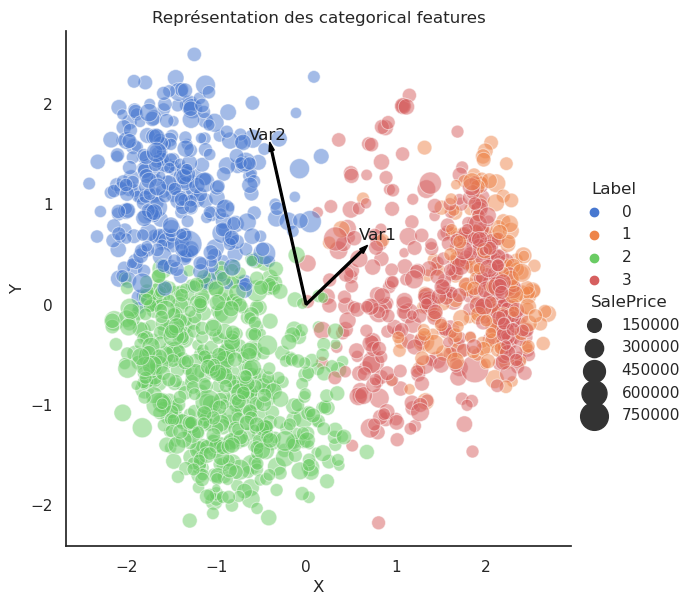

In [13]:
sns.set_theme(style="white")
sns.relplot(x="X", y="Y", hue="Label", size="SalePrice",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pca_dataset)
dir1 = pca.transform(pca.components_[0].reshape(1,-1))
dir2 = pca.transform(pca.components_[1].reshape(1,-1))

plt.arrow(0, 0, dir1[0][0], dir1[0][1], color = 'black', alpha = 1, width=.02)
plt.arrow(0, 0, dir2[0][0], dir2[0][1], color = 'black', alpha = 1, width=.02)
plt.text(1.3*dir1[0][0], 1.3*dir1[0][1], "Var1", color = 'k', ha = 'center', va = 'center')
plt.text(1.1*dir2[0][0], 1.1*dir2[0][1], "Var2", color = 'k', ha = 'center', va = 'center')
plt.title("Représentation des categorical features")
plt.show()

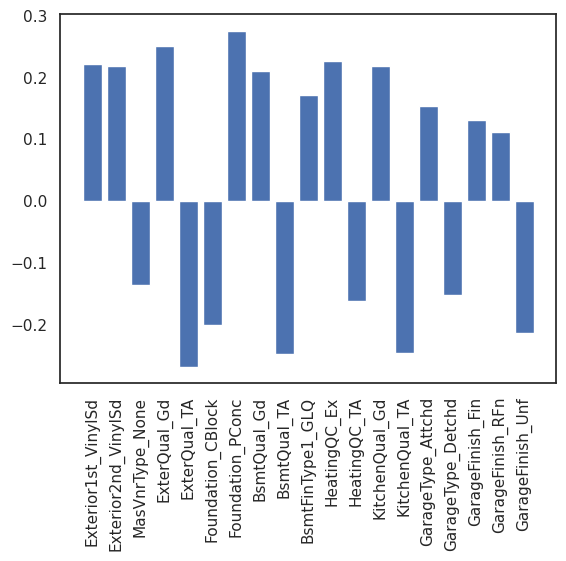

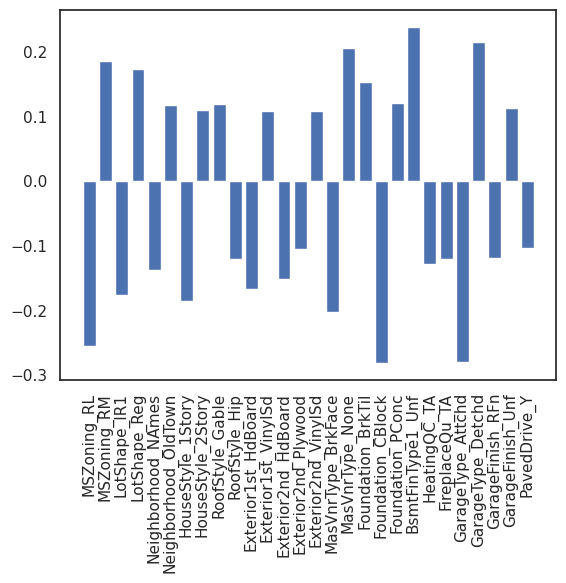

In [115]:
comp1 = pca.components_[0,:]
comp2 = pca.components_[1,:]
sign_feat_comp1 = abs(comp1) >= .1
sign_feat_comp2 = abs(comp2) >= .1

plt.bar(categorical_encoded_dataset.columns[sign_feat_comp1], comp1[sign_feat_comp1])
plt.xticks(rotation=90)

plt.show()

plt.bar(categorical_encoded_dataset.columns[sign_feat_comp2], comp2[sign_feat_comp2])
plt.xticks(rotation=90)

plt.show()

In [47]:
pca.explained_variance_ratio_

array([0.15018822, 0.06105129])

In [ ]:
indices = [
    index for index, item in enumerate(my_list)
    if item > 10
]

In [203]:
reduced_dataset = dataset[["MSZoning", "LotArea", "Utilities", "LotConfig", "OverallQual", "OverallCond", "HeatingQC", "YearBuilt", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "SalePrice"]]